In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing all the necessary libraries

In [ ]:
import os,re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud,STOPWORDS 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import string


##Reading the data 

In [ ]:
datas= pd.read_csv("/content/drive/MyDrive/TXTA DS 2021 FALL data/A21--15.csv")
datas.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Fixed Deposit,Comfortable Fixed deposit,BAJI,2019-07-15,I have opt for five years of fixed deposit wit...,Corporation-Bank,4.0
1,Saving Account,Beneficial account,MADAKE,2019-07-15,Corporation bank has less charges for online b...,Corporation-Bank,5.0
2,Credit Card,Good Experience,VIJAY LIMBAJI MADAKE,2019-07-15,Past 15 years I have been using Corporation ba...,Corporation-Bank,5.0
3,Saving Account,Good,KHAN,2019-07-14,I have a savings account in corporation bank....,Corporation-Bank,3.0
4,Saving Account,Good,LU,2019-07-13,From last 3 years i have an savings account in...,Corporation-Bank,4.0


In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     4634 non-null   object 
 1   Heading   4633 non-null   object 
 2   Reviewer  4630 non-null   object 
 3   Date      4634 non-null   object 
 4   Review    4634 non-null   object 
 5   Bank      4634 non-null   object 
 6   Rating    4634 non-null   float64
dtypes: float64(1), object(6)
memory usage: 253.5+ KB


In [ ]:
datas['Date'] = pd.to_datetime(datas['Date'])
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     4634 non-null   object        
 1   Heading   4633 non-null   object        
 2   Reviewer  4630 non-null   object        
 3   Date      4634 non-null   datetime64[ns]
 4   Review    4634 non-null   object        
 5   Bank      4634 non-null   object        
 6   Rating    4634 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 253.5+ KB


In [ ]:
datas.isna().sum()

Title       0
Heading     1
Reviewer    4
Date        0
Review      0
Bank        0
Rating      0
dtype: int64

In [ ]:
datas.dropna(inplace=True)
datas.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Fixed Deposit,Comfortable Fixed deposit,BAJI,2019-07-15,I have opt for five years of fixed deposit wit...,Corporation-Bank,4.0
1,Saving Account,Beneficial account,MADAKE,2019-07-15,Corporation bank has less charges for online b...,Corporation-Bank,5.0
2,Credit Card,Good Experience,VIJAY LIMBAJI MADAKE,2019-07-15,Past 15 years I have been using Corporation ba...,Corporation-Bank,5.0
3,Saving Account,Good,KHAN,2019-07-14,I have a savings account in corporation bank....,Corporation-Bank,3.0
4,Saving Account,Good,LU,2019-07-13,From last 3 years i have an savings account in...,Corporation-Bank,4.0


In [ ]:
datas.shape

(4629, 7)

In [ ]:
datas['Review'].value_counts()

Co-operation bank provides ok customer service.However when I call customer service, they are unable to give me a solution soon.It takes time for them to reply back with a resolution and hence there is a delay.It would be better if I get a quick response from the bank.Online portal is good.                                                                                       5
Its been a year since I  am holding this account, when ever I go the Branch have asked us to wait, and they wont get back to us or else they will at times forget about it completely, also they wont provide solution to the problem at times, or they keep diverting us to the other person also which can be avoided if there is no crowd at the branch the response would be good.    5
I am overall satisfied with the Corporation Bank salary account since i am using this account for the past nine years i did not face any issues, net banking facility is excellent, i got good number of ATM's and i get alert message from the 

In [ ]:
datas_new=datas.copy()

##Pre-processing for the text analytics

In [ ]:
## Cleaning the texts,removing the unnecessary stuffs 
def new_txt(value):
  value = re.sub('\n','',value)
  value = value.lower()
  ##converting the upper case into lower case 
  value = re.sub('[''""]','',value)
  value = re.sub('\[.*?\]','',value)
  ##square brackets removed
  value = re.sub('\w*\d\w*','',value)
  value = re.sub('[%s]' % re.escape(string.punctuation),'',value)
  return value
y = lambda x : new_txt(x)  
datas_new['new_review'] = pd.DataFrame(datas_new['Review'].apply(y))
datas_new.head()



,Title,Heading,Reviewer,Date,Review,Bank,Rating,new_review
0,Fixed Deposit,Comfortable Fixed deposit,BAJI,2019-07-15,I have opt for five years of fixed deposit wit...,Corporation-Bank,4.0,i have opt for five years of fixed deposit wit...
1,Saving Account,Beneficial account,MADAKE,2019-07-15,Corporation bank has less charges for online b...,Corporation-Bank,5.0,corporation bank has less charges for online b...
2,Credit Card,Good Experience,VIJAY LIMBAJI MADAKE,2019-07-15,Past 15 years I have been using Corporation ba...,Corporation-Bank,5.0,past years i have been using corporation bank...
3,Saving Account,Good,KHAN,2019-07-14,I have a savings account in corporation bank....,Corporation-Bank,3.0,i have a savings account in corporation bank ...
4,Saving Account,Good,LU,2019-07-13,From last 3 years i have an savings account in...,Corporation-Bank,4.0,from last years i have an savings account in ...


here we see that the review after being cleaned and transformed is displayed in a seperate column called new_review.

In [ ]:
z = " ".join(datas_new['new_review'])
z

'i have opt for five years of fixed deposit with corporation bank  i can invest minimum of rs  and max amount they are providing the current interest of  per annum but i can also prolong the duration i have online option to deposit the fd amount even the maturity comes along the interest to the direct account corporation bank has less charges for online banking and cash withdrawal mostly they are very customer friendly whenever i go to the bank they explain all the features and latest technology and they do have good scheme for senior citizen more over they give financial support to invest the money past  years i have been using corporation bank credit card they have quick customer service and the credit limit is also good its a complimentary card based on the salary account i have free card its good for daily day life it has good facility i have  a savings account in corporation bank not satisfied with the process always delay which i am not happy i have tied up with canara bank when 

In [ ]:
token = re.findall("\w+",z)
token

['i',
 'have',
 'opt',
 'for',
 'five',
 'years',
 'of',
 'fixed',
 'deposit',
 'with',
 'corporation',
 'bank',
 'i',
 'can',
 'invest',
 'minimum',
 'of',
 'rs',
 'and',
 'max',
 'amount',
 'they',
 'are',
 'providing',
 'the',
 'current',
 'interest',
 'of',
 'per',
 'annum',
 'but',
 'i',
 'can',
 'also',
 'prolong',
 'the',
 'duration',
 'i',
 'have',
 'online',
 'option',
 'to',
 'deposit',
 'the',
 'fd',
 'amount',
 'even',
 'the',
 'maturity',
 'comes',
 'along',
 'the',
 'interest',
 'to',
 'the',
 'direct',
 'account',
 'corporation',
 'bank',
 'has',
 'less',
 'charges',
 'for',
 'online',
 'banking',
 'and',
 'cash',
 'withdrawal',
 'mostly',
 'they',
 'are',
 'very',
 'customer',
 'friendly',
 'whenever',
 'i',
 'go',
 'to',
 'the',
 'bank',
 'they',
 'explain',
 'all',
 'the',
 'features',
 'and',
 'latest',
 'technology',
 'and',
 'they',
 'do',
 'have',
 'good',
 'scheme',
 'for',
 'senior',
 'citizen',
 'more',
 'over',
 'they',
 'give',
 'financial',
 'support',
 'to'

In [ ]:
!pip install collections


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
from collections import Counter

In [ ]:
token_no = [i for i in token if i not in STOPWORDS]
token_no[:20]

['opt',
 'five',
 'years',
 'fixed',
 'deposit',
 'corporation',
 'bank',
 'invest',
 'minimum',
 'rs',
 'max',
 'amount',
 'providing',
 'current',
 'interest',
 'per',
 'annum',
 'prolong',
 'duration',
 'online']

Making the wordcloud

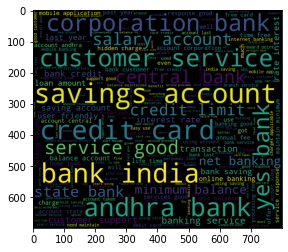

In [ ]:
word_c = WordCloud(width = 800,height = 700,stopwords = STOPWORDS)
plt.imshow(word_c.generate_from_text(z))

In [ ]:
cnt = Counter(token_no)
cnt.most_common(20)

[('bank', 7230),
 ('good', 4360),
 ('account', 4335),
 ('card', 3367),
 ('service', 2662),
 ('customer', 2167),
 ('banking', 2140),
 ('credit', 2079),
 ('years', 1735),
 ('loan', 1715),
 ('using', 1590),
 ('savings', 1446),
 ('services', 1437),
 ('time', 1369),
 ('india', 1314),
 ('andhra', 1253),
 ('charges', 1221),
 ('use', 1178),
 ('limit', 1105),
 ('corporation', 1080)]

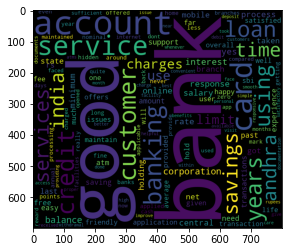

In [ ]:
## Wordcloud for the most occuring words .
occ_words = {j:k for j,k in cnt.most_common(150)}
plt.imshow(word_c.generate_from_frequencies(occ_words))

##Now we will start the modelling process from here 

In [ ]:
datas_new.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating,new_review
0,Fixed Deposit,Comfortable Fixed deposit,BAJI,2019-07-15,I have opt for five years of fixed deposit wit...,Corporation-Bank,4.0,i have opt for five years of fixed deposit wit...
1,Saving Account,Beneficial account,MADAKE,2019-07-15,Corporation bank has less charges for online b...,Corporation-Bank,5.0,corporation bank has less charges for online b...
2,Credit Card,Good Experience,VIJAY LIMBAJI MADAKE,2019-07-15,Past 15 years I have been using Corporation ba...,Corporation-Bank,5.0,past years i have been using corporation bank...
3,Saving Account,Good,KHAN,2019-07-14,I have a savings account in corporation bank....,Corporation-Bank,3.0,i have a savings account in corporation bank ...
4,Saving Account,Good,LU,2019-07-13,From last 3 years i have an savings account in...,Corporation-Bank,4.0,from last years i have an savings account in ...


In [ ]:
datas_1 = datas_new.copy()
datas_1

,Title,Heading,Reviewer,Date,Review,Bank,Rating,new_review
0,Fixed Deposit,Comfortable Fixed deposit,BAJI,2019-07-15,I have opt for five years of fixed deposit wit...,Corporation-Bank,4.0,i have opt for five years of fixed deposit wit...
1,Saving Account,Beneficial account,MADAKE,2019-07-15,Corporation bank has less charges for online b...,Corporation-Bank,5.0,corporation bank has less charges for online b...
2,Credit Card,Good Experience,VIJAY LIMBAJI MADAKE,2019-07-15,Past 15 years I have been using Corporation ba...,Corporation-Bank,5.0,past years i have been using corporation bank...
3,Saving Account,Good,KHAN,2019-07-14,I have a savings account in corporation bank....,Corporation-Bank,3.0,i have a savings account in corporation bank ...
4,Saving Account,Good,LU,2019-07-13,From last 3 years i have an savings account in...,Corporation-Bank,4.0,from last years i have an savings account in ...
...,...,...,...,...,...,...,...,...
4629,Saving Account,Need to work on the extra charges,ADITYA RATHORE,2019-03-22,I am having my savings account with YES BANK f...,Yes-Bank,4.0,i am having my savings account with yes bank f...
4630,Credit Card,Good Card,DINESH VIJAYRAO PABSHETWAR,2019-03-21,My initial process was good in YES bank for th...,Yes-Bank,5.0,my initial process was good in yes bank for th...
4631,Saving Account,Excellent Service,RAKESH MANSUKHBHAI GEDIYA,2019-03-21,It has almost been one and a half years since ...,Yes-Bank,5.0,it has almost been one and a half years since ...
4632,Saving Account,Yes bank is a good service !!!,RAJESH H D,2019-03-20,"For last 4 months , I am using the Yes bank ac...",Yes-Bank,5.0,for last months i am using the yes bank acco...


In [ ]:
datas_1.columns

Index(['Title', 'Heading', 'Reviewer', 'Date', 'Review', 'Bank', 'Rating',
       'new_review'],
      dtype='object')

In [ ]:
datas_1 = datas_1.drop(['Title','Heading','Reviewer','Date','Review','Bank'],axis = 1)

In [ ]:
datas_1.head()

,Rating,new_review
0,4.0,i have opt for five years of fixed deposit wit...
1,5.0,corporation bank has less charges for online b...
2,5.0,past years i have been using corporation bank...
3,3.0,i have a savings account in corporation bank ...
4,4.0,from last years i have an savings account in ...


In [ ]:
datas_1['Rating'].value_counts()

5.0    1856
4.0    1404
3.0     634
2.0     216
4.5     165
1.0     148
3.5     133
2.5      54
0.5      16
1.5       3
Name: Rating, dtype: int64

In [ ]:
## Since there are a lot of rating values provided so replacing then with their round off values 
datas_1['Rating'] = datas_1['Rating'].replace(0.5,1)
datas_1['Rating'] = datas_1['Rating'].replace(1.5,2)
datas_1['Rating'] = datas_1['Rating'].replace(2.5,3)
datas_1['Rating'] = datas_1['Rating'].replace(3.5,4)
datas_1['Rating'] = datas_1['Rating'].replace(4.5,5)
datas_1['Rating'].value_counts()

5.0    2021
4.0    1537
3.0     688
2.0     219
1.0     164
Name: Rating, dtype: int64

Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
datas_2 = datas_1.copy()

In [ ]:
datas_2 = datas_2[datas_2['Rating']!=3]
datas_2['Rating'].value_counts()

5.0    2021
4.0    1537
2.0     219
1.0     164
Name: Rating, dtype: int64

In [ ]:
datas_2['Rating'] = np.where(datas_2['Rating']> 3,1,0)
datas_2['Rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
4       1
5       1
       ..
4629    1
4630    1
4631    1
4632    1
4633    1
Name: Rating, Length: 3941, dtype: int64>

In [ ]:
datas_2.head()

,Rating,new_review
0,1,i have opt for five years of fixed deposit wit...
1,1,corporation bank has less charges for online b...
2,1,past years i have been using corporation bank...
4,1,from last years i have an savings account in ...
5,1,i am holding a savings account in corporation...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = datas_2['new_review']
Y = datas_2['Rating']

In [ ]:
X.shape,Y.shape

((3941,), (3941,))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
X_train.shape,Y_train.shape

((3152,), (3152,))

In [ ]:
vects = TfidfVectorizer(stop_words = STOPWORDS,ngram_range=(1,2),max_df=0.7,min_df=10,token_pattern="['a-z']+",max_features=200)

In [ ]:
X_train= vects.fit_transform(X_train)

In [ ]:
X_test= vects.fit_transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
predicted = lr.predict(X_test) 

In [ ]:
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.90      1.00      0.95       712

    accuracy                           0.90       789
   macro avg       0.45      0.50      0.47       789
weighted avg       0.81      0.90      0.86       789



**SVC model**

The objective of a  SVC (Support Vector Classifier) is to fit to the data we provide, returning a "best fit" hyperplane that categorizes, your data. From there, after getting the hyperplane, we can then feed some features to our classifier to see what the "predicted" class is.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), parameter_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=   1.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   1.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   1.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.902 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.903 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svc=SVC(C=10, gamma=1,kernel='rbf') 

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=10, gamma=1)

In [ ]:
Y_pred= svc.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.12      0.03      0.04        77
           1       0.90      0.98      0.94       712

    accuracy                           0.89       789
   macro avg       0.51      0.50      0.49       789
weighted avg       0.83      0.89      0.85       789



The above model has been tested using 2 classes only now we will increase the classes and will see that if the accuracy increases or not 

In [ ]:
## SVC using all the classes 
datas_3 = datas_1.copy()

In [ ]:
datas_3.head()

,Rating,new_review
0,4.0,i have opt for five years of fixed deposit wit...
1,5.0,corporation bank has less charges for online b...
2,5.0,past years i have been using corporation bank...
3,3.0,i have a savings account in corporation bank ...
4,4.0,from last years i have an savings account in ...


In [ ]:
X = datas_3['new_review']
Y = datas_3['Rating']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)


In [ ]:
X_train= vects.fit_transform(X_train)

In [ ]:
X_test= vects.fit_transform(X_test)

In [ ]:
parameter_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), parameter_grid, refit = True, verbose = 3)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.437 total time=   3.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.437 total time=   3.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   3.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   3.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   3.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.437 total time=   3.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.437 total time=   3.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.436 total time=   3.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.436 total time=   3.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.436 total time=   3.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.437 total time=   3.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svc = SVC(C=1,gamma=1,kernel='rbf')

In [ ]:
svc.fit(X_train,Y_train)

SVC(C=1, gamma=1)

In [ ]:
Y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        33
         2.0       0.00      0.00      0.00        44
         3.0       0.25      0.05      0.08       138
         4.0       0.33      0.15      0.21       307
         5.0       0.47      0.87      0.61       404

    accuracy                           0.44       926
   macro avg       0.21      0.21      0.18       926
weighted avg       0.35      0.44      0.35       926

